In [1]:
from garmentcode_dataset import GarmentCodeData
from garmentcodedata.pattern_converter import NNSewingPattern, InvalidPatternDefError
from IPython.display import Image
from pathlib import Path
import numpy as np
import os

In [2]:
root_dir = "/miele/timur/garmentcodedata"
dataset = GarmentCodeData(root_dir, start_config={'random_pairs_mode': False, 'body_type' : 'default_body',
                        'panel_classification' : '/home/timur/sewformer-garments/garment-estimator/nn/data_configs/panel_classes.json',
                        'max_pattern_len' : 37,                            
                        'max_panel_len' : 40,
                        'max_num_stitches' : 108,
                        'mesh_samples' : 2000, 
                        'max_datapoints_per_folder' : 10,                          
                        'stitched_edge_pairs_num': 100, 'non_stitched_edge_pairs_num': 100,
                        'shuffle_pairs': False, 'shuffle_pairs_order': False, 
                        'data_folders': [
                        "garments_5000_0",
                        # "garments_5000_1", "garments_5000_2", "garments_5000_3", "garments_5000_4", "garments_5000_5", "garments_5000_6", "garments_5000_7", "garments_5000_8"
                        ]})

Loading data from /miele/timur/garmentcodedata/garments_5000_0/default_body
Data folder garments_5000_0/default_body has 10 clean datapoints
PanelClasses::INFO::Loading panel classes from file:  /home/timur/sewformer-garments/garment-estimator/nn/data_configs/panel_classes.json
The panel classes in this dataset are : ['left_btorso', 'left_ftorso', 'right_ftorso', 'right_btorso', 'skirt_front', 'skirt_back', 'wb_back', 'wb_front', 'left_sleeve_b', 'left_sleeve_f', 'right_sleeve_f', 'right_sleeve_b', 'sl_left_cuff_skirt_f', 'sl_left_cuff_skirt_b', 'sl_right_cuff_skirt_b', 'sl_right_cuff_skirt_f', 'sl_left_cuff_b', 'sl_left_cuff_f', 'sl_right_cuff_f', 'sl_right_cuff_b', 'pant_f_l', 'pant_b_l', 'pant_f_r', 'pant_b_r', 'left_collar_front', 'left_collar_back', 'right_collar_front', 'right_collar_back', 'ins_skirt_front_0', 'ins_skirt_back_0', 'ins_skirt_back_1', 'ins_skirt_front_1', 'skirt_panel_2', 'skirt_panel_0', 'skirt_panel_1', 'skirt_panel_3', 'skirt_panel_4', 'skirt_panel_5', 'ins_ski

/home/timur/miniconda3/envs/neural_tailor/lib/python3.9/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/timur/miniconda3/envs/neural_tailor/lib/python3.9/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


GarmentCodeData::garments_5000_0/default_body/rand_VJ6AU7ADUY::WARNING::Not enough segmentation labels -- 10295 for 10868 vertices. Setting segmenations to zero


In [3]:
dp = dataset[0]
gt = dp['ground_truth']
prediction = gt
pattern = NNSewingPattern(view_ids=False, panel_classifier=dataset.panel_classifier)
pattern.name = 'test'
pattern.pattern_from_tensors(prediction['outlines'].detach().numpy(), panel_rotations=prediction['rotations'].detach().numpy(),panel_translations=prediction['translations'].detach().numpy(), stitches=gt['stitches'].detach().numpy(), padded=True) 
final_dir = pattern.serialize('/home/timur/garment_foundation_model/', to_subfolder=True, tag='_predicted_', with_3d=False, with_text=False, view_ids=False)
home_path = Path('/home/timur/garment_foundation_model/')
Image(filename=home_path/ (pattern.name + '_predicted_')/ (pattern.name + '_predicted__' +'pattern.png'))

print(prediction['rotations'].detach().numpy().shape)
prediction['rotations'].detach().numpy()

(75, 4)


array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        , -0.38657415,  0.9222583 ],
       [ 0.        ,  0.        , -0.38657415,  0.9222583 ],
       [ 0.        ,  0.        ,  0.38657415,  0.9222583 ],
       [ 0.        ,  0.        ,  0.38657415,  0.9222583 ],
       [ 0.        ,  0.        ,  0.3787859 ,  0.9254843 ],
       [ 0.        ,  0.        ,  0.3787859 ,  0.9254843 ],
       [ 0.        ,  0.        , -0.3787859 ,  0.9254843 ],
       [ 0.        ,  0.        , -0.3787859 ,  0.9254843 ],
       [ 0.        ,  0.

In [4]:
outlines = prediction['outlines'].detach().numpy()
num_panels = gt['num_panels'].detach().numpy()
num_edges = gt['num_edges'].detach().numpy()


stats = {   'f_scale': [16.385906219482422, 33.822059631347656, 9.643412590026855], 
            'f_shift': [0.05804843455553055, 90.08223724365234, -1.1796010732650757], 
            'gt_scale': 
                {'outlines': [20.63924789428711, 18.21150016784668, 0.17899632453918457, 0.10782408714294434, 0.2640206813812256, 0.10782728344202042, 1.0], 
                'rotations': [0.6532815098762512, 1.7071068286895752, 1.0040857791900637, 1.7033932209014893], 
                'stitch_tags': [607.9130859375, 291.62359619140625, 394.298095703125], 
                'translations': [14.315205574035645, 54.16756820678711, 12.597636222839355]}, 
            'gt_shift': 
                {'outlines': [0, 0, 0.09542620927095412, -0.0016535775503143668, 0.14501391351222992, -0.001607653801329434, 0.0], 
                 'rotations': [0, -1, -0.5020428895950317, -0.7033931612968445], 
                 'stitch_tags': [-303.95654296875, -69.890625, -195.70266723632812], 
                 'translations': [0.003780973609536886, 32.58546829223633, 0.7617195248603821]}}


bin_size = 256
shift = np.min(outlines.reshape(-1, 7), axis=0)
scale = np.max(outlines.reshape(-1, 7), axis=0) - shift

panel_found = np.where(num_edges > 0)[0]

In [5]:

# garment_start, panel_start, panel_end, garment_end
special_tokens = np.arange(4) + bin_size
tokens = np.array([special_tokens[0]])
non_zero_num_edges = num_edges[num_edges > 0]

for panel in range(num_panels):
    curr_tokens = np.array([special_tokens[1]])

    curr_panel = outlines[panel_found[panel]][:non_zero_num_edges[panel]]
    # edge_params: np.ndarray = (curr_panel - np.array(stats['gt_shift']['outlines']) )/ np.array(stats['gt_scale']['outlines'])
    edge_params: np.ndarray = (curr_panel - shift )/ scale
    edge_params = np.clip(edge_params, 0, 1) * bin_size
    edge_params = edge_params.flatten()
    curr_tokens = np.concatenate([curr_tokens, edge_params])
    curr_tokens = np.concatenate([curr_tokens, np.array([special_tokens[2]])])
    tokens = np.concatenate([tokens, curr_tokens])
tokens = np.array(tokens, dtype=np.uint32)
# panel1 = outlines[0][:num_edges[0]]
# edge_params = (panel1 - shift )/ scale
# edge_params = np.clip(edge_params, 0, 1) * bin_size
# edge_params = edge_params.flatten()
# edge_params = edge_params.reshape(-1, 7)
# edge_params /= bin_size
# edge_params = edge_params * scale + shift




# total_panel_tokens = (tokens.shape[0]-1) 

# special_panels = num_panels * 2

# (total_panel_tokens - special_panels) / 7

# print(edge_params)
# print(outlines[:2, :4])


BasicPattern::Warning::test_tokenization::Panels were updated but new stitches info was not provided. Stitches are removed.


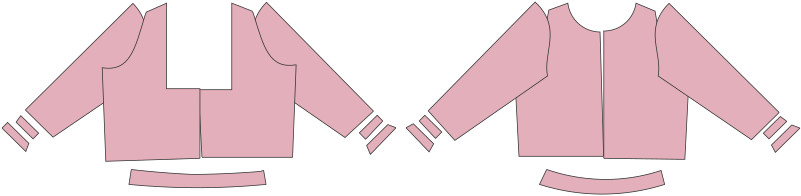

In [6]:

# decode
max_pattern_len = 75
max_panel_len = 40

start_panel = np.where(tokens==special_tokens[1])[0]
end_panel = np.where(tokens==special_tokens[2])[0]



detokenized = []
for i in range(len(start_panel)):
    start = start_panel[i]
    end = end_panel[i]
    panel_outlines = tokens[start+1:end]
    panel_outlines = panel_outlines.reshape(-1, 7)
    panel_outlines = panel_outlines / bin_size
    # panel_outlines = panel_outlines * np.array(stats['gt_scale']['outlines']) + np.array(stats['gt_shift']['outlines']) 
    panel_outlines = panel_outlines *  scale + shift
    # panel_outlines[np.where(panel_outlines[:,6] > 0.9), 6] = 1.0
    # panel_outlines[np.where(panel_outlines[:,6] < 0.9), 6] = 0.0
    padding = np.zeros((max_panel_len - len(panel_outlines), 7))
    panel_outlines = np.concatenate([panel_outlines, padding])
    detokenized.append(panel_outlines)

empty_panel = np.zeros((max_pattern_len - len(detokenized), max_panel_len, 7))
detokenized = np.array(detokenized)
detokenized = np.concatenate([detokenized, empty_panel])





pattern = NNSewingPattern(view_ids=False, panel_classifier=dataset.panel_classifier)
pattern.name = 'test_tokenization'
# pattern.pattern_from_tensors(detokenized, panel_rotations=prediction['rotations'].detach().numpy(),panel_translations=prediction['translations'].detach().numpy(), stitches=gt['stitches'].detach().numpy(), padded=True) 
os.system(f'rm -rf /home/timur/garment_foundation_model/test_tokenization_predicted_')
pattern.pattern_from_tensors(detokenized[:num_panels], panel_rotations=prediction['rotations'].detach().numpy()[panel_found],panel_translations=prediction['translations'].detach().numpy()[panel_found], stitches=None, padded=True) 
final_dir = pattern.serialize('/home/timur/garment_foundation_model/', to_subfolder=True, tag='_predicted_', with_3d=False, with_text=False, view_ids=False)
home_path = Path('/home/timur/garment_foundation_model/')
Image(filename=home_path/ (pattern.name + '_predicted_')/ (pattern.name + '_predicted__' +'pattern.png'))

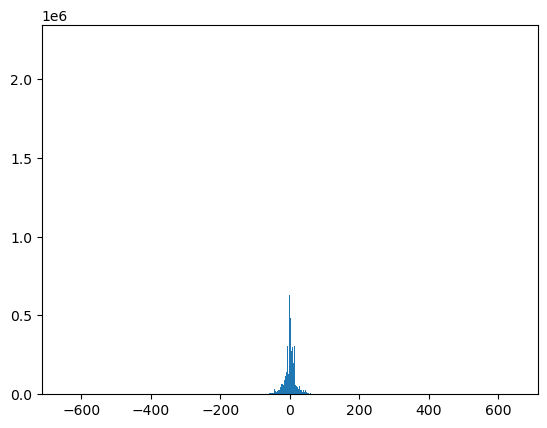

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

dims = []
for n in range(7):
    dims.append(torch.load(f'/home/timur/dim_{n}.pt'))

f = dims[0].detach().numpy()
plt.hist(f, bins= 1000)
plt.show()

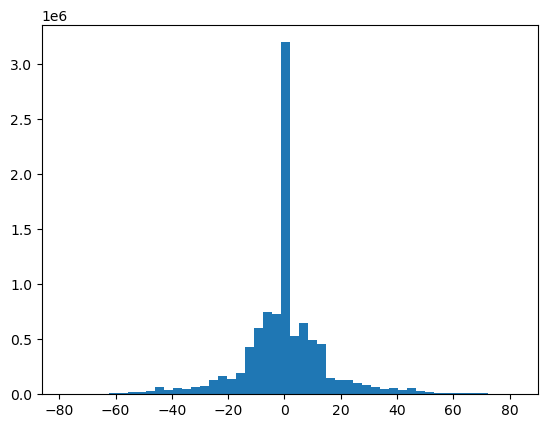

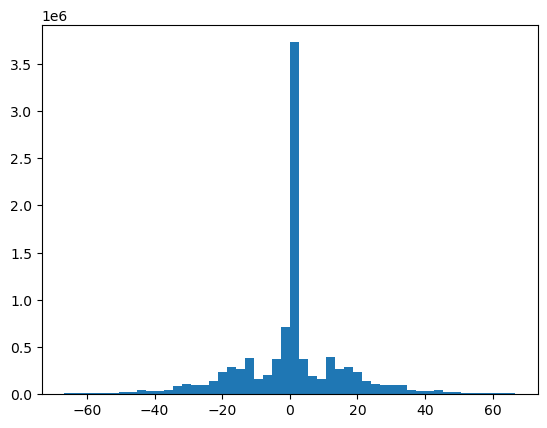

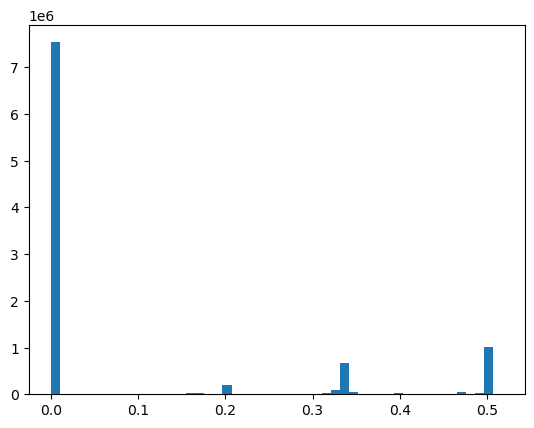

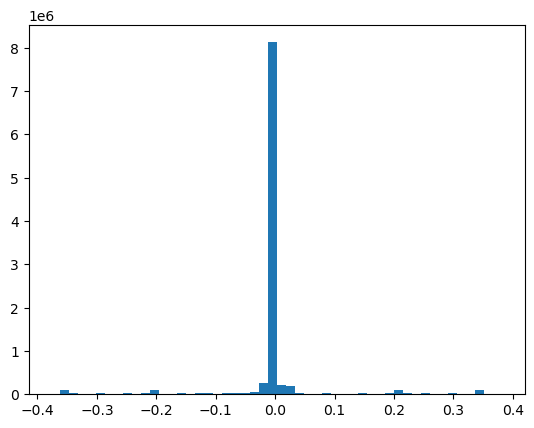

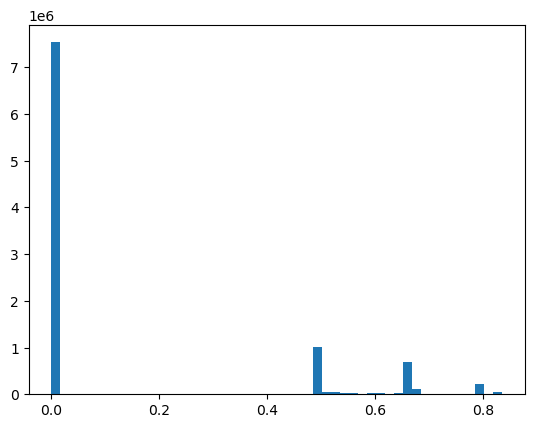

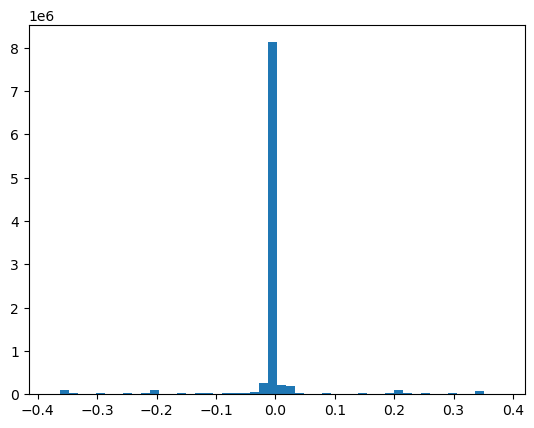

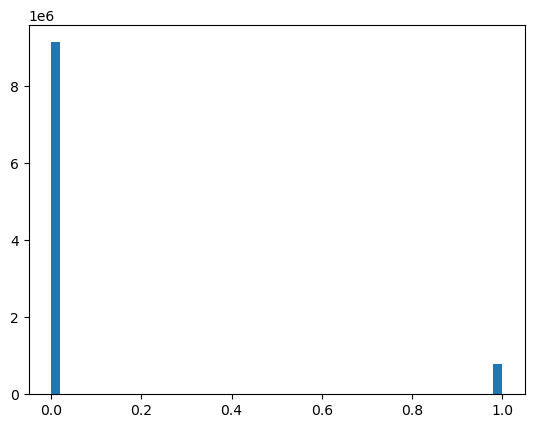

[-51.205456, -49.627438, 0.0, -0.35, 0.0, -0.35, 0.0]
[104.316666, 99.264435, 0.5, 0.7, 0.8, 0.7, 1.0]


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

dims = []
f = []
lengths = []
for n in range(7):
    dims.append(torch.load(f'/home/timur/dim_{n}.pt'))
    f.append(dims[n].detach().numpy())
    lengths.append(len(f[n]))

percentage = 0.005

for i in range(7): 
    plt.hist(f[i][int(percentage*lengths[i]):-int(percentage*lengths[i])], bins= 50)
    plt.show()

shift = []
scale = []
for dim in dims: 
    dim = dim.detach().numpy()  
    length = len(dim)
    shift.append(np.min(dim[int(length*0.0125):]))
    scale.append(np.max(dim[:int(-length*0.0125)]) - shift[-1])
print(shift)
print(scale)



In [9]:
num_edges = len(f[-1])
arcs = f[-1]
cubics = np.logical_and(np.logical_or(f[-2]!=0, f[-3]!=0), arcs==0)
quadratic = np.logical_and(np.logical_and(np.logical_or(f[-4]!=0, f[-5]!=0), arcs==0), cubics==0)
linear = np.logical_and(np.logical_and(np.logical_and(np.logical_and(f[2]==0, f[3]==0), f[4]==0), f[5]==0), f[6]==0)
print('percentage arc: ', arcs.sum() / num_edges)
print('percentage cubic: ', cubics.sum() / num_edges)
print('percentage quadratic: ', quadratic.sum() / num_edges)
print('percentage linear: ', linear.sum() / num_edges)

percentage arc:  0.08437940853819284
percentage cubic:  0.3017447259190165
percentage quadratic:  4.8893675812577965e-05
percentage linear:  0.6138269718669781


In [71]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.show() 

In [ ]:
# arc to bezier curve: 


r, theta, f_a, f_s, x, y = 1.0, np.pi/2, 1, 1, np.array([0,0]), np.array([1,1])

def arc_to_bezier(r, theta, f_a, f_s, x, y):
    cos_sin_theta = np.array(
        [
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta), np.cos(theta)]
        ]
    )

    x_prime = cos_sin_theta.T @ np.array( [y[0] - x[0], y[1] - x[1]] ) / 2
    c_prime = np.sqrt(r**2 / (np.linalg.norm(x_prime)**2) - 1) * np.array([x_prime[1], -x_prime[0]])
    c = cos_sin_theta @ c_prime + (x + y) / 2

    start_angle = np.arctan2(np.array([1,0]), x_prime-c_prime / r)
    angle_range = np.arctan2(x_prime-c_prime / r, -x_prime-c_prime / r)

    e = c + r * np.array(
        [np.cos(theta) * np.cos(start_angle), - np.sin(theta) * np.sin(start_angle)]
        [np.sin(theta) * np.cos(start_angle), - np.cos(theta) * np.sin(start_angle)]
    )

    e_prime = r * np.array(
        [-np.cos(theta) * np.sin(start_angle), -np.sin(theta) * np.cos(start_angle)]
        [np.sin(theta) * np.sin(start_angle), -np.cos(theta) * np.cos(start_angle)]
    )

    